In [3]:
from collector import GarbageCollector, EvalSheet
from deap_VRP import Deap_VRP
from deap import base, tools, creator, algorithms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import random
seed = random.randint(1, 10000)
seed = 200
data = "test_1"
fname = data + ".txt"
outfile = fname.replace(".txt", "_out.txt")
collector = GarbageCollector(fname, seed=seed)
print(seed)
deap = Deap_VRP(collector)

200


In [4]:
p_cx = 0.5
p_mut = 0.4

In [5]:

def mutExplore(individual: list[int], indpb: float) -> tuple[list[int]]:
	mut_func = [deap.mutateSwapDayOrder, deap.mutateExchangeDeliverDay]
	rand_func = random.choice(mut_func)
	# rand_func = deap.mutateSwapDayOrder
	return rand_func(individual, indpb)

def fitness(individual: list[int]) -> tuple[int]:
	buffer = deap.evaluateTruckSchedule(individual)
	return (buffer.total_cost, )

def sel_elite_tourn(individuals, size, tournsize):
	k_elite = int(size * 0.1)
	k = size - k_elite
	return tools.selBest(individuals, k_elite) + tools.selTournament(individuals, k, tournsize)

def remove_outliers(data: np) -> np:
	Q1 = np.percentile(data, 25)
	Q3 = np.percentile(data, 75)
	IQR = Q3 - Q1

	# Define the outlier bounds
	lower_bound = Q1 - 1.5 * IQR
	upper_bound = Q3 + 1.5 * IQR

	# Filter out the outliers
	# print(data)
	filtered_data = [
		ele[0] for ele in data if ele[0] >= lower_bound and ele[0] <= upper_bound
	]

	# Calculate the mean of the filtered data
	return np.array(filtered_data)

def average_without_outliers(data):
	return remove_outliers(data).mean()

def std_without_outliers(data):
	buffer = remove_outliers(data)
	return np.std(buffer) if len(buffer) > 1 else 0 


In [6]:
## set up the toolbox
toolbox = base.Toolbox()

creator.create("fitnessMin", base.Fitness, weights=(-1.0,)) # fitness (a class for evaluation)

creator.create("individual", list, fitness=creator.fitnessMin) # a class to represent an individual

toolbox.register("individualInit", tools.initIterate, creator.individual, deap.truckScheduleInit)

toolbox.register("populationInit", tools.initRepeat, list, toolbox.individualInit)

deap.resigterCreatorTemplate(creator.individual)



In [7]:
size = 200
elite = int(size * 0.1)
k = size - elite
toolbox.register("select", sel_elite_tourn, tournsize=2)
toolbox.register("evaluate", fitness)
toolbox.register("mate", deap.crossoverTruck)
toolbox.register("mutate", mutExplore, indpb=0.1)

In [8]:
## build and run the GA
size = 300
starting_pop = toolbox.populationInit(size)
print(starting_pop[0])
buffer = deap.evaluateTruckSchedule(starting_pop[0])
stats = tools.Statistics(lambda ind:ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", average_without_outliers)
stats.register("std", std_without_outliers)
hof = tools.HallOfFame(5)
eval = deap.evaluateTruckSchedule(starting_pop[0])
print(eval)
# print(type(starting_pop[0]))
# print(type(starting_pop[0].individual))


[0, 1, 3, 5, 0, 9, 2, 0, 13, 15, 7, 0, 20, 18, 11, 22, 27, 17, 23, 8, 34, 33, 32, 24, 12, 29, 26, 4, 14, 25, 19, 16, 0, 30, 36, 6, 0, 37, 45, 39, 44, 41, 48, 43, 40, 42, 35, 38, 47, 46, 31, 21, 28, 10, 0, 49, 0, 56, 53, 57, 51, 0, 59, 52, 0, 0, 64, 58, 0, 72, 71, 61, 60, 54, 55, 50, 0, 74, 63, 75, 69, 67, 66, 62, 68, 0, 0, 85, 83, 73, 79, 82, 84, 70, 78, 80, 65, 76, 77, 0, 0, 0, 89, 88, 90, 0, 104, 93, 103, 81, 86, 91, 0, 101, 105, 87, 0, 115, 114, 117, 116, 97, 94, 92, 98, 111, 106, 95, 108, 107, 102, 109, 112, 0, 118, 100, 99, 0, 124, 96, 120, 110, 0, 121, 128, 126, 129, 122, 123, 113, 0, 119, 134, 133, 131, 130, 127, 0, 125, 0, 141, 136, 137, 0, 147, 132, 138, 148, 143, 146, 149, 135, 140, 139, 150, 0, 144, 142, 0, 145, 0, 0, 0, 0]
TruckEvalSheet
total_truck_dist=68098.62833327467
total_truck=47
max_truck=5
truck_violation=0
penalty=0
total_cost=6809872533


In [9]:
iteration = 500

final_pop, logbook = algorithms.eaSimple(
    starting_pop,
    toolbox,
    p_cx,
    p_mut,
    iteration,
    stats,
    hof,
    True
)


gen	nevals	min        	avg        	std        
0  	300   	6.46143e+09	6.86555e+09	1.10494e+08
1  	213   	6.47423e+09	6.79143e+09	1.05157e+08
2  	213   	6.46858e+09	6.72838e+09	1.06888e+08
3  	203   	6.42507e+09	6.65995e+09	9.84795e+07
4  	212   	6.35766e+09	6.59366e+09	7.74375e+07
5  	216   	6.35766e+09	6.54382e+09	7.14376e+07
6  	214   	6.35766e+09	6.50475e+09	7.35506e+07
7  	204   	6.33215e+09	6.47016e+09	6.60087e+07
8  	192   	6.32899e+09	6.43298e+09	5.64833e+07
9  	219   	6.29295e+09	6.40011e+09	4.5816e+07 
10 	208   	6.24463e+09	6.3764e+09 	3.26412e+07
11 	220   	6.24463e+09	6.35871e+09	3.40173e+07
12 	215   	6.22077e+09	6.3354e+09 	3.43429e+07
13 	209   	6.22077e+09	6.31689e+09	3.94903e+07
14 	201   	6.18241e+09	6.29558e+09	3.96918e+07
15 	209   	6.15494e+09	6.27391e+09	3.9618e+07 
16 	206   	6.13366e+09	6.25164e+09	4.28544e+07
17 	213   	6.13366e+09	6.22266e+09	3.30396e+07
18 	215   	6.13366e+09	6.1994e+09 	2.98011e+07
19 	205   	6.10224e+09	6.18194e+09	3.02962e+07
20 	205   	6.

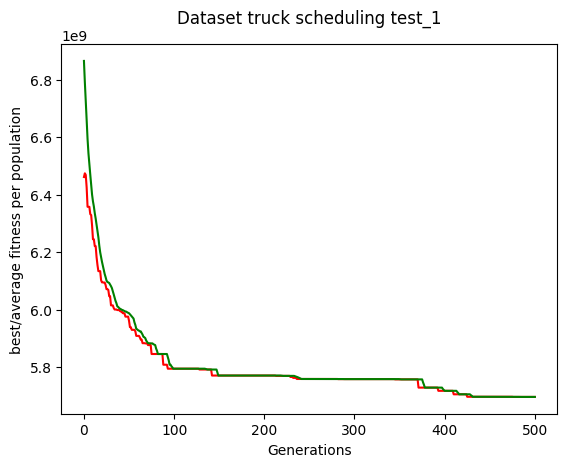

In [10]:
plt.plot(logbook.select("min"), color='red')
plt.plot(logbook.select("avg"), color='green')
plt.xlabel('Generations')
plt.ylabel('best/average fitness per population')
plt.title(f'Dataset truck scheduling {data}', fontsize=12, pad=15)
plt.show()

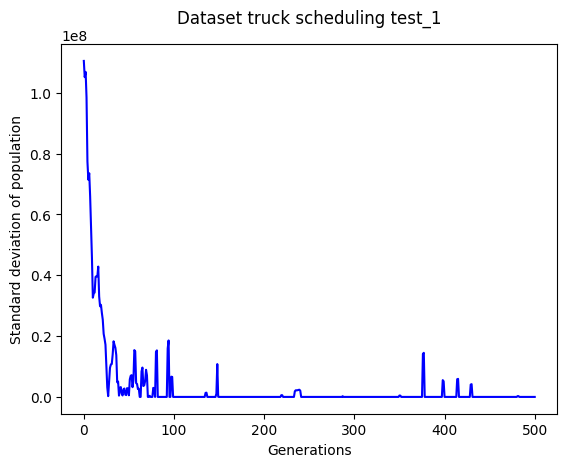

In [11]:
plt.plot(logbook.select("std"), color='blue')
# plt.plot(logbook.select("avg"), color='green')
plt.xlabel('Generations')
plt.ylabel('Standard deviation of population')
plt.title(f'Dataset truck scheduling {data}', fontsize=12, pad=15)
plt.show()

In [ ]:
res = deap.evaluateTruckSchedule(hof[0])
print(res)
print(res.cal_cost(collector))

TruckEvalSheet
total_truck_dist=56957.72514112016
total_truck=38
max_truck=3
truck_violation=0
penalty=0
total_cost=5695779314
5695779314
